In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("mumbai-house-price-data-cleaned.csv")
df.head(10)

,title,price,area,price_per_sqft,locality,city,property_type,bedroom_num,bathroom_num,balcony_num,furnished,age,total_floors,latitude,longitude
0,Octave Parijas Horizon,6600283,757,8719.000000,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.244410,73.123253
1,Shakti Siyara Heights,6169841,652,9462.946319,Kalyan,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.257294,73.148872
2,Bhagwati Bhagwati Celeste,4599936,396,11616.000000,Dombivali,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.209026,73.081276
3,Relcon Ridhi Sidhi Sadan Of Ridhi Sidhi Co Ope...,51980000,1130,46000.000000,Ville Parle,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.097841,72.851158
4,J P Ruchita Bliss,3915000,435,9000.000000,Nala Sopara,Mumbai,Apartment,1,1,0,Unfurnished,0,1,19.420601,72.809319
5,Saras Destiny,4900320,720,6806.000000,Ulwe,Mumbai,Apartment,1,1,0,Unfurnished,0,1,18.967562,73.024956
6,Nexus Ratan Heritage,14000000,652,21472.392638,Jogeshwari,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.137762,72.860130
7,Aristocrat Guruprasad Divine Residency,16400255,565,29027.000000,Chembur,Mumbai,Apartment,2,2,0,Unfurnished,0,1,19.032211,72.895226
8,9 PBR 9 PBR,74998440,1770,42372.000000,Nerul,Mumbai,Apartment,3,3,0,Unfurnished,0,1,19.008259,73.013031
9,Prestige Bellanza Phase 2 Wing D E F At The Pr...,65900000,2600,25346.153846,Mulund,Mumbai,Apartment,4,5,0,Unfurnished,0,1,19.184473,72.940758


In [3]:
df.columns


Index(['title', 'price', 'area', 'price_per_sqft', 'locality', 'city',
       'property_type', 'bedroom_num', 'bathroom_num', 'balcony_num',
       'furnished', 'age', 'total_floors', 'latitude', 'longitude'],
      dtype='object')

In [4]:
df.drop(['title','balcony_num','furnished', 'age', 'total_floors', 'latitude', 'longitude','property_type'], axis="columns", inplace=True)

In [5]:
df.head(5)

,price,area,price_per_sqft,locality,city,bedroom_num,bathroom_num
0,6600283,757,8719.000000,Kalyan,Mumbai,2,2
1,6169841,652,9462.946319,Kalyan,Mumbai,2,2
2,4599936,396,11616.000000,Dombivali,Mumbai,1,1
3,51980000,1130,46000.000000,Ville Parle,Mumbai,3,3
4,3915000,435,9000.000000,Nala Sopara,Mumbai,1,1


In [6]:
df.drop(["city"], axis="columns", inplace=True)

In [7]:
df.head()

,price,area,price_per_sqft,locality,bedroom_num,bathroom_num
0,6600283,757,8719.000000,Kalyan,2,2
1,6169841,652,9462.946319,Kalyan,2,2
2,4599936,396,11616.000000,Dombivali,1,1
3,51980000,1130,46000.000000,Ville Parle,3,3
4,3915000,435,9000.000000,Nala Sopara,1,1


In [8]:
df.locality.unique()

array(['Kalyan', 'Dombivali', 'Ville Parle', 'Nala Sopara', 'Ulwe',
       'Jogeshwari', 'Chembur', 'Nerul', 'Mulund', 'Nallasopara W',
       'Dombivli', 'Taloje', 'Panvel', 'Shil Phata', 'Vangani',
       'Kharghar', 'Nalasopara', 'Badlapur', 'Mumbra', 'Vasai',
       'Ambernath', 'Powai', 'Koper Khairane', 'Kalamboli', 'Andheri',
       'Goregaon', 'Borivali', 'Kasaradavali Thane', 'Vile Parle',
       'Kandivali', 'Mira Road', 'Malad', 'Prabhadevi', 'Dadar',
       'Lower Parel', 'Taloja', 'Wadala', 'Virar', 'Thane', 'Bhandup',
       'Nahur', 'Khar', 'Deonar', 'Ghansoli', 'Thakurli', 'Bandra',
       'Vashi', 'Bhayandar', 'Kalwa', 'Ghatkopar', 'Vikhroli', 'Mahim',
       'Parel', 'Dahisar', 'Kurla', 'Santacruz', 'Worli', 'Byculla',
       'Airoli', 'Kamothe', 'Sion', 'Juhu', 'Bhiwandi', 'Vikroli',
       'Naigaon', 'Palghar', 'Saphale', 'Makane Kapase', 'Vevoor',
       'Amboli', 'Titwala', 'Police Colony', 'Sanpada',
       'Hiranandani Estates', 'Kanjurmarg', 'Seawoods', 'Shelu'

In [9]:
location_stats=df.groupby("locality")["locality"].agg("count").sort_values(ascending=False)
location_stats

locality
Thane                    8211
Mira Road                4872
Kandivali                2933
Kharghar                 2843
Andheri                  2671
                         ... 
Vakola Yashwant Nagar       1
Vazira Naka                 1
Veera Desai Road            1
Yari Road                   1
Acc Cement Road             1
Name: locality, Length: 408, dtype: int64

In [10]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [11]:
location_stats_less_than_10

locality
Jvpd Scheme              10
Shelu                    10
Pisavli Village          10
Khardi                    9
Koproli                   9
                         ..
Vakola Yashwant Nagar     1
Vazira Naka               1
Veera Desai Road          1
Yari Road                 1
Acc Cement Road           1
Name: locality, Length: 274, dtype: int64

In [12]:
df.locality=df.locality.apply(lambda x : "other" if x in location_stats_less_than_10 else x)


In [13]:
df.shape

(71938, 6)

In [14]:
df.head(6)

,price,area,price_per_sqft,locality,bedroom_num,bathroom_num
0,6600283,757,8719.000000,Kalyan,2,2
1,6169841,652,9462.946319,Kalyan,2,2
2,4599936,396,11616.000000,Dombivali,1,1
3,51980000,1130,46000.000000,Ville Parle,3,3
4,3915000,435,9000.000000,Nala Sopara,1,1
5,4900320,720,6806.000000,Ulwe,1,1


In [15]:

df["location"]=df["locality"]
df["total_sqft"]=df["area"]
df["bhk"]=df["bedroom_num"]
df["bath"]=df["bathroom_num"]
df["price"]=df["price"]

In [16]:
df.columns

Index(['price', 'area', 'price_per_sqft', 'locality', 'bedroom_num',
       'bathroom_num', 'location', 'total_sqft', 'bhk', 'bath'],
      dtype='object')

In [17]:
df2=df.drop(['locality', 'bedroom_num',
       'bathroom_num','area'], axis="columns",)

In [18]:
df2

,price,price_per_sqft,location,total_sqft,bhk,bath
0,6600283,8719.000000,Kalyan,757,2,2
1,6169841,9462.946319,Kalyan,652,2,2
2,4599936,11616.000000,Dombivali,396,1,1
3,51980000,46000.000000,Ville Parle,1130,3,3
4,3915000,9000.000000,Nala Sopara,435,1,1
...,...,...,...,...,...,...
71933,38931000,57000.000000,Dadar,683,2,2
71934,54663000,57000.000000,Dadar,959,3,3
71935,15135866,35866.981043,Andheri,422,1,1
71936,25500000,35764.375877,Andheri,713,2,2


In [19]:
df2.describe()

,price,price_per_sqft,total_sqft,bhk,bath
count,7.193800e+04,71938.000000,71938.000000,71938.000000,71938.000000
mean,1.951272e+07,18489.401813,943.251369,1.993884,2.082432
std,3.320767e+07,12691.857370,645.881922,0.914573,0.854540
min,3.200000e+04,25.376685,123.000000,0.000000,1.000000
25%,6.524250e+06,9230.769231,595.000000,1.000000,2.000000
50%,1.200000e+07,16080.402010,775.000000,2.000000,2.000000
75%,2.150000e+07,23913.043478,1100.000000,3.000000,2.000000
max,2.147484e+09,290000.000000,24109.000000,15.000000,15.000000


In [20]:
df2["price"]=df["price"]/100000

In [21]:
df2

,price,price_per_sqft,location,total_sqft,bhk,bath
0,66.00283,8719.000000,Kalyan,757,2,2
1,61.69841,9462.946319,Kalyan,652,2,2
2,45.99936,11616.000000,Dombivali,396,1,1
3,519.80000,46000.000000,Ville Parle,1130,3,3
4,39.15000,9000.000000,Nala Sopara,435,1,1
...,...,...,...,...,...,...
71933,389.31000,57000.000000,Dadar,683,2,2
71934,546.63000,57000.000000,Dadar,959,3,3
71935,151.35866,35866.981043,Andheri,422,1,1
71936,255.00000,35764.375877,Andheri,713,2,2


In [22]:
df2.describe()

,price,price_per_sqft,total_sqft,bhk,bath
count,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000
mean,195.127178,18489.401813,943.251369,1.993884,2.082432
std,332.076653,12691.857370,645.881922,0.914573,0.854540
min,0.320000,25.376685,123.000000,0.000000,1.000000
25%,65.242500,9230.769231,595.000000,1.000000,2.000000
50%,120.000000,16080.402010,775.000000,2.000000,2.000000
75%,215.000000,23913.043478,1100.000000,3.000000,2.000000
max,21474.836470,290000.000000,24109.000000,15.000000,15.000000


In [23]:
# we gotta remve the range 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



# iska ulta matlab u want to get the values that has rnage 
df2[~df2["total_sqft"].apply(is_float)]


,price,price_per_sqft,location,total_sqft,bhk,bath


In [24]:
df2.isnull().sum()

price             0
price_per_sqft    0
location          0
total_sqft        0
bhk               0
bath              0
dtype: int64

In [25]:
df2.shape

(71938, 6)

In [26]:
def remove_pps(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df3=remove_pps(df2)
df3.shape

(53338, 6)

In [27]:
df3.describe()

,price,price_per_sqft,total_sqft,bhk,bath
count,53338.000000,53338.000000,53338.000000,53338.000000,53338.000000
mean,178.207660,17691.179670,927.270295,1.964303,2.055420
std,263.484813,10754.659218,597.192610,0.884334,0.822789
min,4.910000,982.000000,123.000000,0.000000,1.000000
25%,67.000000,9106.811558,600.000000,1.000000,2.000000
50%,120.000000,16176.470588,770.000000,2.000000,2.000000
75%,203.999410,23215.821152,1100.000000,2.000000,2.000000
max,21474.836470,94912.680334,24109.000000,15.000000,15.000000


In [28]:
# checking the reoval of price outlier by standard deviation mehtod 

def remove_pps_(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df4=remove_pps(df3)
df4.shape

(33727, 6)

In [29]:
df4.describe()

,price,price_per_sqft,total_sqft,bhk,bath
count,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000
mean,173.212351,17424.911831,924.044920,1.947816,2.037537
std,219.784334,10507.034598,568.538728,0.874605,0.812501
min,7.000000,2631.578947,123.000000,1.000000,1.000000
25%,66.280000,8920.187793,600.000000,1.000000,2.000000
50%,118.000000,16266.666667,771.000000,2.000000,2.000000
75%,200.000000,23104.245672,1100.000000,2.000000,2.000000
max,9999.999990,77777.777778,20000.000000,15.000000,15.000000


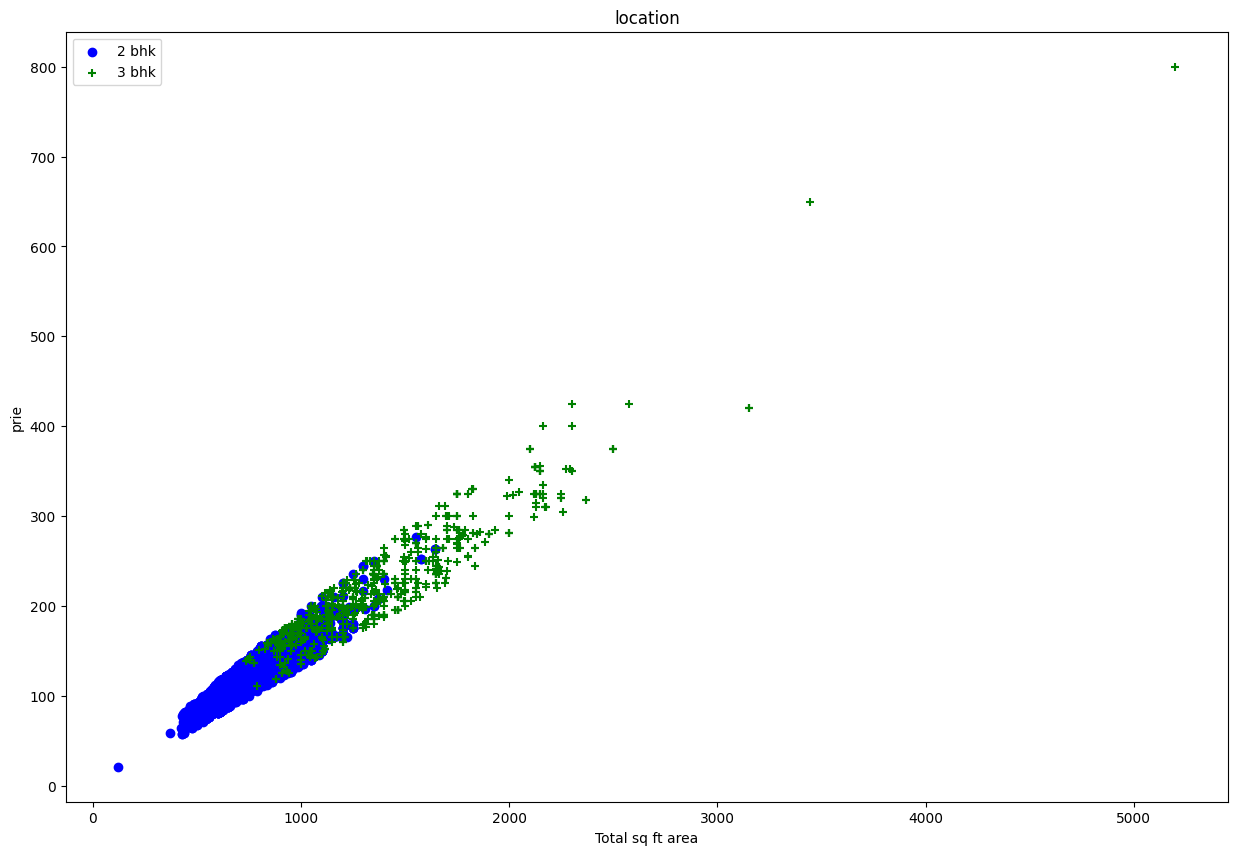

In [30]:
# kaahi kaahi pe same location me 2 bhk ka price zyad hia than 4 bhk 
# toh we need to see that data points 
def plot_scatter(df, location):
    bhk2=df[(df.location==location) &(df.bhk==2)]
    bhk3=df[(df.location==location) &(df.bhk==3)]
    
    
    plt.figure(figsize=(15, 10))
    plt.scatter(bhk2.total_sqft,bhk2.price, color="blue", label="2 bhk")
    plt.scatter(bhk3.total_sqft,bhk3.price, marker="+", color="green", label="3 bhk")
    plt.xlabel("Total sq ft area")
    plt.ylabel("prie")
    plt.title("location")
    plt.legend()
    
    
plot_scatter(df4,"Thane")

In [31]:
def remove_outlier_bhk(df):
    exclude_indicies=np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if  stats and stats["count"]>5:
                exclude_indicies=np.append(exclude_indicies, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    
    return df.drop(exclude_indicies,axis="index")


df5=remove_outlier_bhk(df4)
df5.shape

(24397, 6)

In [32]:
df5

,price,price_per_sqft,location,total_sqft,bhk,bath
0,390.00000,30000.000000,Agripada,1300,2,2
1,400.00000,32000.000000,Agripada,1250,2,2
2,131.95900,23150.701754,Agripada,570,1,2
3,275.00000,32352.941176,Agripada,850,2,2
4,130.00000,20900.321543,Agripada,622,1,2
...,...,...,...,...,...,...
33722,130.00000,21172.638436,other,614,2,2
33723,77.04201,20221.000000,other,381,1,1
33724,108.99119,20221.000000,other,539,2,2
33725,88.11000,18989.224138,other,464,1,1


In [33]:
df6=df5.copy()

In [ ]:
df6[df6.bath>df6.bhk+2]

,price,price_per_sqft,location,total_sqft,bhk,bath


In [69]:
df7=df6.drop(["price_per_sqft"],axis="columns")
df7.head(25)

,price,location,total_sqft,bhk,bath
0,390.000,Agripada,1300,2,2
1,400.000,Agripada,1250,2,2
2,131.959,Agripada,570,1,2
3,275.000,Agripada,850,2,2
4,130.000,Agripada,622,1,2
5,275.000,Agripada,850,2,2
6,130.000,Agripada,622,1,2
7,250.000,Agripada,1015,2,2
8,300.000,Agripada,1000,2,2
9,300.000,Agripada,1000,2,2


In [44]:
df7[df7.bath>10]

,price,location,total_sqft,bhk,bath
6559,9999.99999,Cuffe Parade,20000,15,15
6560,9999.99999,Cuffe Parade,20000,15,15


In [36]:
df8=df7.copy()

In [37]:
dummies=pd.get_dummies(df8.location).astype(int)
dummies.head()

,Agripada,Airoli,Ambarnath,Ambernath,Ambivli,Andheri,Anjurdive,Badlapur,Bandra,Bandra Kurla Complex,...,Vevoor,Vikhroli,Vikroli,Vile Parle,Vile Parle E,Ville Parle,Virar,Wadala,Worli,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9=pd.concat([df8,dummies.drop("other",axis="columns")],axis="columns")
df9.head(5)

,price,location,total_sqft,bhk,bath,Agripada,Airoli,Ambarnath,Ambernath,Ambivli,...,Versova,Vevoor,Vikhroli,Vikroli,Vile Parle,Vile Parle E,Ville Parle,Virar,Wadala,Worli
0,390.000,Agripada,1300,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,400.000,Agripada,1250,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131.959,Agripada,570,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,275.000,Agripada,850,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130.000,Agripada,622,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df9.shape

(24397, 138)

In [40]:
df9[df9.bath>df9.bhk+2]

,price,location,total_sqft,bhk,bath,Agripada,Airoli,Ambarnath,Ambernath,Ambivli,...,Versova,Vevoor,Vikhroli,Vikroli,Vile Parle,Vile Parle E,Ville Parle,Virar,Wadala,Worli


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
import joblib
import numpy as np

In [46]:
df10=df9.drop("location",axis="columns")
df10.head(4)

,price,total_sqft,bhk,bath,Agripada,Airoli,Ambarnath,Ambernath,Ambivli,Andheri,...,Versova,Vevoor,Vikhroli,Vikroli,Vile Parle,Vile Parle E,Ville Parle,Virar,Wadala,Worli
0,390.000,1300,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,400.000,1250,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131.959,570,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,275.000,850,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X=df10.drop("price",axis="columns")
X.head()

,total_sqft,bhk,bath,Agripada,Airoli,Ambarnath,Ambernath,Ambivli,Andheri,Anjurdive,...,Versova,Vevoor,Vikhroli,Vikroli,Vile Parle,Vile Parle E,Ville Parle,Virar,Wadala,Worli
0,1300,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,570,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,850,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,622,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=df10.price
y.head()

0    390.000
1    400.000
2    131.959
3    275.000
4    130.000
Name: price, dtype: float64

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=10)


In [52]:
linear_reg=LinearRegression()
linear_reg.fit(X_train , y_train)

LinearRegression()

In [53]:
linear_reg.score(X_test,y_test)

0.8677161118845014

In [54]:
linear_pred=linear_reg.predict(X_test)
mean_squared_error(y_test , linear_pred)

5527.655502326084

In [55]:
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
rfr_model.score(X_test,y_test)

0.9367555025976722

In [57]:
rfr_pred=rfr_model.predict(X_test)
mean_squared_error(y_test ,rfr_pred)

2642.754148204283

In [58]:
rfr_model2=RandomForestRegressor(max_depth=10, min_samples_leaf=4,min_samples_split=2 , n_estimators=8)
rfr_model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=8)

In [59]:
rfr_model2.score(X_test,y_test)

0.7620470616187214

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV

In [61]:
para_grid_dt = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10],  
    "max_features": ["sqrt", "log2", None]  
}
grid_dt=GridSearchCV(dt_model, para_grid_dt,cv=2)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [62]:
grid_dt.score(X_test,y_test)

0.9175371459797859

In [63]:
dt_pred=grid_dt.predict(X_test)
mean_squared_error(y_test ,dt_pred)


3445.8183476158656

In [64]:

def predict_price_another(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))  
    
 
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    

    if location in X.columns:
        loc_index = X.columns.get_loc(location)
        x[loc_index] = 1  

  
    x_df = pd.DataFrame([x], columns=X.columns)

    return linear_reg.predict(x_df)[0]  


In [70]:
predict_price_another("Wadala",1000,2,2)


np.float64(373.0830121552377)

In [71]:
predict_price_another("Wadala",1000,2,3)

np.float64(375.5164971377615)

In [73]:
predict_price_another("Thane",1500,3,3)

np.float64(336.65026574759594)

In [74]:
import pickle
with open("mumbai_rfr_model.pickle","wb") as f:
    pickle.dump(rfr_model,f)

In [75]:
import json

columns = {
    "data_columns": list(X.columns)  # Convert the index object to a list
}

with open("mumbai_columns_rfr.json", "w") as f:
    f.write(json.dumps(columns))